In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Documents\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df=pd.get_dummies(df,columns=["Geography", "Gender"],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
import tensorflow
from  tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
model = Sequential()

model.add(Dense(64,activation='sigmoid',input_dim=11))
model.add(Dense(32,activation='relu'))
Dropout(0.2)
model.add(Dense(32,activation='relu'))
Dropout(0.2)
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,         
    restore_best_weights=True
)

In [19]:
history = model.fit(x_train_scaled,y_train,batch_size=20,epochs=10,verbose=1,validation_split=0.2,callbacks=[early_stopping]) 

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7991 - loss: 0.4639 - val_accuracy: 0.8050 - val_loss: 0.4379
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8078 - loss: 0.4291 - val_accuracy: 0.8094 - val_loss: 0.4297
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8217 - loss: 0.4195 - val_accuracy: 0.8206 - val_loss: 0.4138
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8313 - loss: 0.3975 - val_accuracy: 0.8425 - val_loss: 0.3705
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8483 - loss: 0.3684 - val_accuracy: 0.8575 - val_loss: 0.3498
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8562 - loss: 0.3559 - val_accuracy: 0.8606 - val_loss: 0.3471
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8606 - loss: 0.3482 - val_accuracy: 0.8500 - val_loss: 0.3537
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8627 - loss: 0.3456 - val_accuracy: 0.

In [36]:
model.layers[0].get_weights()

[array([[-0.02363065, -0.15977333,  0.19571474],
        [ 1.7954501 , -1.9912113 , -0.5627076 ],
        [-0.06548839, -0.12374993,  0.10545693],
        [ 0.31495818,  0.22462554, -0.302482  ],
        [-0.02219381,  0.0833992 ,  0.19027993],
        [-0.0157901 ,  0.09497755, -0.02340271],
        [-0.08654605,  0.5047047 ,  0.9656746 ],
        [-0.08859035,  0.09059617, -0.17001146],
        [ 0.06950345, -0.72495246, -0.60207593],
        [ 0.06622919, -0.1605502 ,  0.01529836],
        [-0.37816954,  0.57358605,  0.27111065]], dtype=float32),
 array([-0.29629025,  0.6596115 ,  0.5095238 ], dtype=float32)]

In [21]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [30]:
y_pred=np.where(y_log>0.5, 1,0)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.857

In [27]:
import matplotlib.pyplot as plt

In [28]:
history.history

{'accuracy': [0.7990624904632568,
  0.807812511920929,
  0.8217187523841858,
  0.831250011920929,
  0.8482812643051147,
  0.856249988079071,
  0.8606250286102295,
  0.8626562356948853,
  0.8612499833106995,
  0.8628125190734863],
 'loss': [0.4639367163181305,
  0.42906248569488525,
  0.41951024532318115,
  0.3975086510181427,
  0.36839866638183594,
  0.35594499111175537,
  0.348246693611145,
  0.34555432200431824,
  0.3423333764076233,
  0.3402831256389618],
 'val_accuracy': [0.8050000071525574,
  0.809374988079071,
  0.8206250071525574,
  0.8424999713897705,
  0.8575000166893005,
  0.8606250286102295,
  0.8500000238418579,
  0.8500000238418579,
  0.8637499809265137,
  0.856249988079071],
 'val_loss': [0.43791699409484863,
  0.4297434985637665,
  0.41378459334373474,
  0.3705155849456787,
  0.34975486993789673,
  0.3471055328845978,
  0.3536717891693115,
  0.350675493478775,
  0.341877818107605,
  0.3399032950401306]}

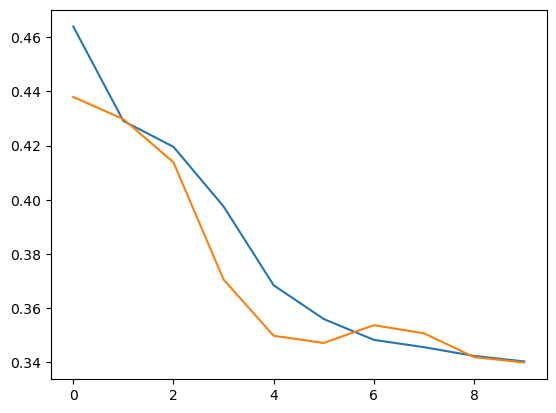

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

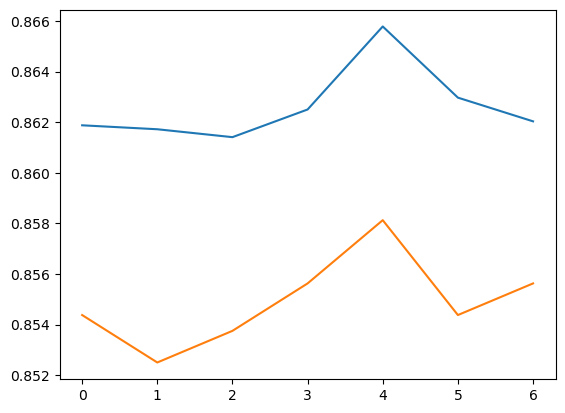

In [65]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])